# Assignment-03-Q4 (Hypothesis Testing)

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('C:/Users/Payod/Downloads/Costomer+OrderForm.csv')
data

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
5,Error Free,Error Free,Error Free,Error Free
6,Error Free,Defective,Error Free,Error Free
7,Error Free,Error Free,Error Free,Error Free
8,Error Free,Error Free,Error Free,Error Free
9,Error Free,Error Free,Error Free,Error Free


In [7]:
data.Phillippines.value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [8]:
data.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [9]:
data.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [10]:
data.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [6]:
data.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [12]:
data.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
Phillippines    300 non-null object
Indonesia       300 non-null object
Malta           300 non-null object
India           300 non-null object
dtypes: object(4)
memory usage: 9.5+ KB


In [16]:
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
contingency_table

[[271, 267, 269, 280], [29, 33, 31, 20]]

# Expected Value Calculations

In [18]:
stat, p, df, exp = stats.chi2_contingency(contingency_table)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [20]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

# PLOTTING DATA

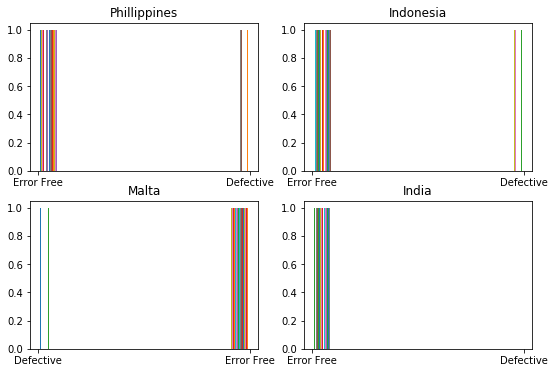

In [8]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.hist(data['Phillippines'])
plt.title('Phillippines')
plt.subplot(222)
plt.hist(data['Indonesia'])
plt.title('Indonesia')
plt.subplot(223)
plt.hist(data['Malta'])
plt.title('Malta')
plt.subplot(224)
plt.hist(data['India'])
plt.title('India')
plt.show()

# Transformations

Text(0.5, 1.0, 'Cube Root')

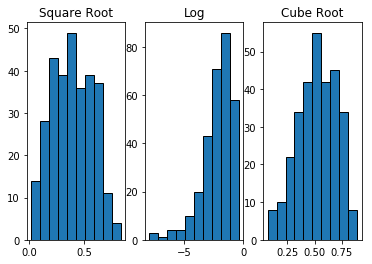

In [13]:
data_log = np.log(data)
data_log1 = np.sqrt(data)
data_log2 = np.cbrt(data)
fig, axs = plt.subplots(nrows=1, ncols=3)
axs[0].hist(data_log1, edgecolor='black')
axs[0].set_title('Square Root')
axs[1].hist(data_log, edgecolor='black')
axs[1].set_title('Log')
axs[2].hist(data_log2, edgecolor='black')
axs[2].set_title('Cube Root')

# HYPOTHESIS TESTING FROM ABOVE INCIDENCES USING T-STATISTICS

In [21]:
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


BY COMPARING p_value with Alpha (SIGNIFICANCE LEVEL)
CHECKING NULl HYPOTHESIS 
p_value not equal to alpha, then failed to reject Null Hypothesis due to no evidenece
p_value equal to alpha, then Null Hypothesis Succesfully rejected

In [23]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.425
We fail to reject Null hypothesis
